In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
cultivar_mix_data_20 = pd.read_csv(r"/home/simmondsh/Desktop/git_repos/cultivar_mixture_modelling/cultivar_mix_disease_scoring_2020.csv", header = 0)
cultivar_mix_data_20

,Plot,Trat,Cultivar,Plant,Z1,S1,Z2,S2,Z3,S3,Z4,S4
0,A1,C1,C,1,1,10,3.0,25.0,10.0,95.0,NaN,NaN
1,A1,C1,C,2,0,5,5.0,20.0,10.0,50.0,NaN,100.0
2,A1,C1,C,3,1,15,7.0,30.0,20.0,85.0,NaN,100.0
3,A1,C1,C,4,0,30,0.0,40.0,15.0,100.0,NaN,100.0
4,A1,C1,C,5,0,10,3.0,10.0,15.0,60.0,5.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,E3,A3C1,C,26,0,30,3.0,20.0,7.0,17.0,NaN,100.0
356,E3,A3C1,A,27,2,15,7.0,20.0,20.0,90.0,NaN,100.0
357,E3,A3C1,C,28,1,5,1.0,3.0,10.0,17.0,3.0,40.0
358,E3,A3C1,A,29,1,7,5.0,15.0,25.0,40.0,10.0,100.0


In [67]:
cultivar_mix_data_20[["Trat","Cultivar"]].astype(str)

,Trat,Cultivar
0,C1,C
1,C1,C
2,C1,C
3,C1,C
4,C1,C
...,...,...
355,A3C1,C
356,A3C1,A
357,A3C1,C
358,A3C1,A


In [68]:
cultivar_mix_data_20_s2z2 = cultivar_mix_data_20[["Trat", "Cultivar","S2","Z2"]]
cultivar_mix_data_20 = cultivar_mix_data_20.drop(['Plant'], axis = 1)
cultivar_mix_data_20 = cultivar_mix_data_20.drop(['Plot'], axis = 1)
cultivar_mix_data_20 = cultivar_mix_data_20.drop(['Cultivar'], axis = 1)
#df["diagnosis"].replace({"B": 0, "M": 1}, inplace=True)
cultivar_mix_data_20["Trat"].replace({"C1":100, "A1C3":75, "A1C1":50, "A3C1":25, "A1":0}, inplace = True)

In [69]:
s2_group = cultivar_mix_data_20_s2z2.groupby(["Trat","Cultivar"]).S2.mean()
z2_group = cultivar_mix_data_20_s2z2.groupby(["Trat","Cultivar"]).Z2.mean()

In [70]:
s2z2 = cultivar_mix_data_20_s2z2.groupby(["Trat","Cultivar"]).mean().reset_index()
s2z2

,Trat,Cultivar,S2,Z2
0,A1,A,22.711111,8.933333
1,A1C1,A,36.733333,7.000000
2,A1C1,C,14.755556,1.955556
3,A1C3,A,33.431818,9.545455
4,A1C3,C,16.022222,4.066667
5,A3C1,A,37.711111,9.733333
6,A3C1,C,17.711111,1.511111
7,C1,C,17.400000,3.822222


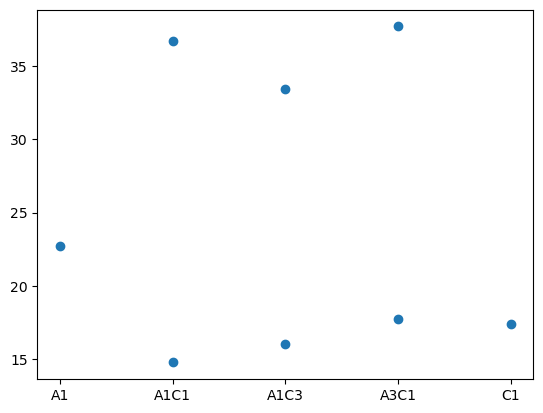

In [71]:
plt.scatter(s2z2['Trat'],s2z2['S2'])

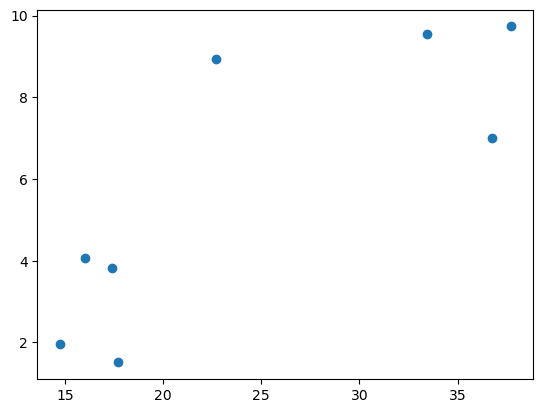

In [72]:
plt.scatter(s2z2['S2'],s2z2['Z2'])

In [73]:
cultivar_mix_data_20.head(20)

,Trat,Z1,S1,Z2,S2,Z3,S3,Z4,S4
0,100,1,10,3.0,25.0,10.0,95.0,NaN,NaN
1,100,0,5,5.0,20.0,10.0,50.0,NaN,100.0
2,100,1,15,7.0,30.0,20.0,85.0,NaN,100.0
3,100,0,30,0.0,40.0,15.0,100.0,NaN,100.0
4,100,0,10,3.0,10.0,15.0,60.0,5.0,60.0
5,100,0,7,5.0,7.0,4.0,20.0,15.0,100.0
6,100,0,7,1.0,12.0,15.0,50.0,10.0,98.0
7,100,1,5,1.0,15.0,7.0,40.0,NaN,NaN
8,100,1,25,1.0,10.0,3.0,60.0,NaN,NaN
9,100,0,7,1.0,5.0,10.0,30.0,15.0,100.0


In [74]:
df = cultivar_mix_data_20.groupby(["Trat"]).mean().reset_index()

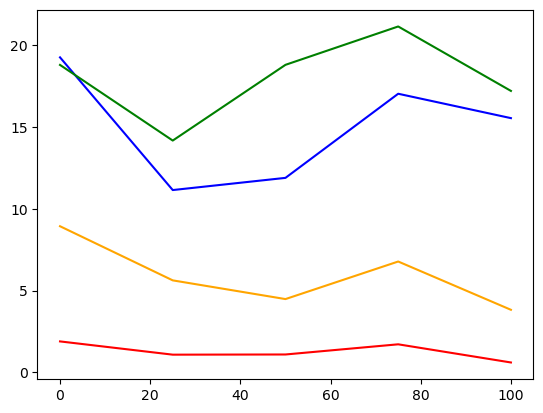

In [75]:
plt.plot(df['Trat'],df['Z1'], color = 'Red')
plt.plot(df['Trat'],df['Z2'], color ='Orange')
plt.plot(df['Trat'],df['Z3'], color = 'Blue')
plt.plot(df['Trat'],df['Z4'], color = 'Green')
plt.show()

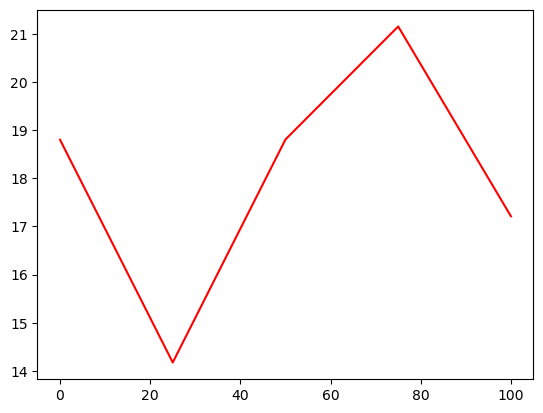

In [76]:
plt.plot(df['Trat'],df['Z4'], color = 'Red')

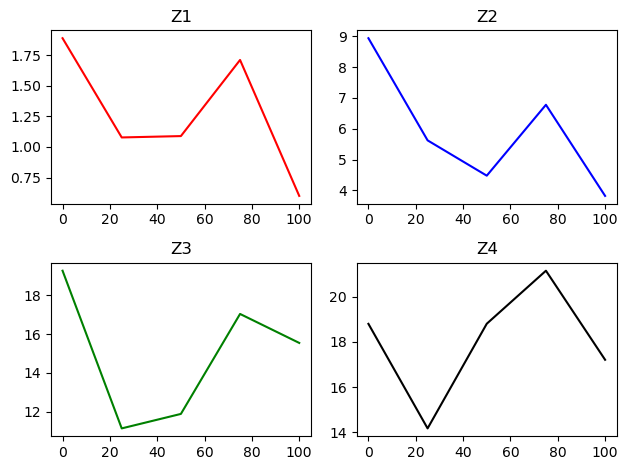

In [77]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df['Trat'],df['Z1'], color = 'Red')
axs[0,0].set_title("Z1")

axs[0,1].plot(df['Trat'],df['Z2'], color = 'Blue')
axs[0,1].set_title("Z2")

axs[1,0].plot(df['Trat'],df['Z3'], color = 'Green')
axs[1,0].set_title("Z3")

axs[1,1].plot(df['Trat'],df['Z4'], color = 'Black')
axs[1,1].set_title("Z4")

fig.tight_layout()